In [ ]:
                            ####Exam 1.5 March 23 - March 24, 2023#####

In [ ]:
#Instructions

#There are 20 questions 
#Each question is worth 1 point
#Write your name and ID in the cells below
#Ensure your code runs, you save your file before you upload into Canvas


In [ ]:
#Student Name: Alex Ojemann

In [ ]:
#Student ID: 109722375

In [ ]:
#RUN ALL THE CELLS IN SUCCESSION BEFORE QUESTION 1 BEFORE YOU ANSWER QUESTIONS 1 - 9 BELOW

#The objective of Questions 1 - 9 is to guide you through the steps of applying principal components analysis (PCA)
# to visualize a multi-dimensional dataset in a 2-dimansional chart

#Refer to the file INFO 4604 - 5604 Feb 14 Class - Principal Component Analysis on Week 5: Feb 13 - Feb 17 on Canvas
#to assist you move through the steps if you need help.

#Be careful to use the object names as specified in the questions below. Spell the object names as specified



In [1]:
#Load libraries and dataset

import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#load dataset into Pandas DataFrame

#Loading the mpg dataset and assigning to dataframe df

df = sns.load_dataset('mpg').dropna()

#Checking the structure of the dataset - number of rows and number of columns (features or variables)
df.shape

(392, 9)

In [2]:
#Display the first few observations of df


df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
#Display data types for all variables


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [4]:
#Remove column "name"

df = df.drop(['name'], axis=1)


In [5]:
#Display data frame after removal of column "name"


df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [6]:

#Separate features from target


features = ['mpg', 'cylinders', 'displacement', 'horsepower','weight','acceleration','model_year']

#Separating out the features - and storing in x

x = df.loc[:, features].values

#Separating out the target - and storing in y

y = df.loc[:, 'origin'].values



In [7]:
#Question 1

#Write Python code to display x

#Write your answer below:

x

array([[  18. ,    8. ,  307. , ..., 3504. ,   12. ,   70. ],
       [  15. ,    8. ,  350. , ..., 3693. ,   11.5,   70. ],
       [  18. ,    8. ,  318. , ..., 3436. ,   11. ,   70. ],
       ...,
       [  32. ,    4. ,  135. , ..., 2295. ,   11.6,   82. ],
       [  28. ,    4. ,  120. , ..., 2625. ,   18.6,   82. ],
       [  31. ,    4. ,  119. , ..., 2720. ,   19.4,   82. ]])

In [8]:
#Question 2

#Write Python code to display y

#Write your code below:


y

array(['usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'usa', 'usa', 'japan', 'usa', 'usa', 'usa',
       'japan', 'europe', 'europe', 'europe', 'europe', 'europe', 'usa',
       'usa', 'usa', 'usa', 'usa', 'japan', 'usa', 'japan', 'usa', 'usa',
       'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'europe', 'europe',
       'europe', 'japan', 'japan', 'europe', 'usa', 'japan', 'usa',
       'europe', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'japan', 'usa', 'usa', 'usa', 'usa', 'europe',
       'europe', 'europe', 'europe', 'usa', 'japan', 'japan', 'usa',
       'japan', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa',
       'europe', 'usa', 'usa', 'usa', 'usa', 'usa', 'japan', 'usa',
       'japan', 'japan', 'usa', 'usa', 'europe', 'usa', 'usa', 'europe',
    

In [11]:
#Question 3

#It is customary to standardize the features of a dataset ahead of PCA and not the target

#Write Python code to standardize x

#store your result in x

#Write your code below:

scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

In [13]:
#Question 4

#We want to call the PCA() by setting the number of principal components we want
#We would like to display our multi-dimensional dataset in 2D, so we set the n_components argument to 2

#n_components = 2 specifies that you want to project a multi-dimensional dataset to 2 -dimensions
# i.e. you want to keep the top 2 principal components for your visualization

#Write Python code to call an instance of PCA with n_components = 2
#Store the instance in the object pca

#Write your answer below:


pca = PCA(n_components = 2)

In [15]:
#Question 5

#Using the object pca from Question 4 above, 
#Write Python code to fit and transform x to extract the two top principal components (PC1 and PC2)
#Store in an object principalComponents

#Wite your answer below

pca.fit(x)
principalComponents = pca.transform(x)

In [22]:
#Question 6

#Now that we have our principal components, we can put them in a data frame

#Write Python code to place principal components PC1 and PC2 that you stored in principalComponents above
# in a data frame called principalDf

#Call the columns 'principal component 1' and principal component 2

principalDf = pd.DataFrame(data=principalComponents,columns=["PC1","PC2"])
principalDf

,PC1,PC2
0,2.635049,0.929039
1,3.493800,0.805473
2,2.970415,0.881186
3,2.910197,0.961721
4,2.903826,0.952789
...,...,...
387,-1.440898,-1.226641
388,-4.112474,-1.330384
389,-1.566816,-1.225221
390,-2.041842,-1.151837


In [30]:
#Question 7

#We need to bring our principal components and target variable i.e. origin together in 
#a dataframe that now has 3 columns. We do this via contatenation


#Write Python code to concatenate the principal components in principalDf above with the outcome variable origin

#Store your result in an object called finalDf

#Write your answer below:

finalDf = pd.concat([principalDf,df],axis=1)[["PC1","PC2","origin"]]

In [31]:
#Question 8

#Write Python code to display finalDf

#Write your answer below:

finalDf

,PC1,PC2,origin
0,2.635049,0.929039,usa
1,3.493800,0.805473,usa
2,2.970415,0.881186,usa
3,2.910197,0.961721,usa
4,2.903826,0.952789,usa
...,...,...,...
393,NaN,NaN,usa
394,NaN,NaN,europe
395,NaN,NaN,usa
396,NaN,NaN,usa


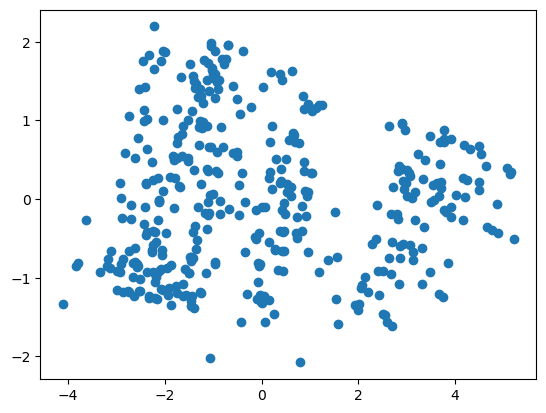

In [35]:
#Question 9


#We can now visualize 2D Projection of original multi-dimensional data

#The principal components carry a lot of the information in the original feature set

#Write Python code to visualize the principal components. Use a scatterplot (Seaborn if you can). 

#Put principal component 1 on the x-axis and
# principal component 2 on the y-axis

#Write your answer below:


plt.pyplot.scatter(x = finalDf.loc[:, 'PC1'].values, y = finalDf.loc[:, 'PC2'].values)
plt.pyplot.show()

In [48]:
#Question 10

#From your display in Question 9, what origin appears to dominate the cluster to the right hand side of your screen?

#usa, japan or europe?

#Write your answer below:

#Right cluster is where PC1 >=2
df_filtered = finalDf.loc[finalDf['PC1'] >= 2]
df_filtered.loc[:, 'origin'].values
#Most are usa

array(['usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'japan', 'usa',
       'usa', 'usa', 'japan', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'usa', 'usa', 'europe', 'usa', 'usa', 'usa',
       'europe', 'usa', 'europe', 'japan', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'europe', 'usa',
       'usa', 'usa', 'japan', 'europe', 'usa', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'usa', 'japan', 'usa', 'usa', 'usa', 'usa',
       'usa', 'usa', 'usa', 'usa', 'usa'], dtype=object)

In [1]:
#RUN THIS CELL FIRST BEFORE ANSWERING QUESTIONS 11 - 20 BELOW
#Refer to INFO 4604 - 5604 - Linear Models - March 9 2023 Class on Week 8: March 6 - March 10 in Canvas for help

#The questions below need you to use statsmodel, which is impoted here as sm


import statsmodels.api as sm
from sklearn import linear_model
import pandas as pd


X = [1, 2, 2, 4, 2, 1, 5, 4, 2, 4, 4, 3, 6]
y = [76, 78, 85, 88, 72, 69, 94, 94, 88, 92, 90, 75, 96]
X=sm.add_constant(X)




In [2]:
#Question 11

#Write Python code to display X

#Write your answer below:

X

array([[1., 1.],
       [1., 2.],
       [1., 2.],
       [1., 4.],
       [1., 2.],
       [1., 1.],
       [1., 5.],
       [1., 4.],
       [1., 2.],
       [1., 4.],
       [1., 4.],
       [1., 3.],
       [1., 6.]])

In [3]:
#Question 12

#Write Python code to display y


#Write your answer below:

y

[76, 78, 85, 88, 72, 69, 94, 94, 88, 92, 90, 75, 96]

In [8]:
#Question 13

#Write Python code to fit an OLS model of y on X using sm.OLS() from StatsModel

#Store your result in an object called model

#Write your answer below:

model=sm.OLS(y,X)

In [9]:
#Question 14

#Write Python code to obtain the summary of the results stored in model in Question 13

#Write your answer below:
modelFit=model.fit()
modelFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     24.03
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           0.000470
Time:                        18:17:12   Log-Likelihood:                -39.306
No. Observations:                  13   AIC:                             82.61
Df Residuals:                      11   BIC:                             83.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.2128      3.439     20.124      0.000      61.643      76.783
x1             4.9309      1.006      4.902      0.000       2.717       7.145
==============================================================================
Omnibus:                        0.085   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.301
Skew:                          -0.099   Prob(JB):                        0.860
Kurtosis:                       2.282   Cond. No.                         8.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Question 15

#From your summary in Question 14, what is the absolute value of the difference between
#Your R-Squared and Adjusted R-Squared values?

#Write your answer below rounded to 2 decimal places:



0.69 - 0.66 = 0.03

In [ ]:
#Question 16

#What is the coefficient on your explanatory variable?

#Write your answer below rounded to 2 decimal places:





4.93

In [ ]:
#Question 17


#Look at the p-value for the coefficient on your explanatory variable.

#Does the p-value suggest statistical significance if we assume an alpha/significance level of 0.05?Yes or No?

#Write your answer below:





The p value is 0.000 so yes it is statistically significant at alpha = 0.05.

In [ ]:
#Question 18

#Given your answer in Question 17 above, write your linear regression equation
#Using the coefficient estimates in the summary in Question 14 rounded to 2 decimal places:

#Write your answer below:




y = 69.21 + 4.93x

In [ ]:
#Question 19

#Use your linear equation to predict a value for y if X = 5?

#Write your answer below:



93.86

In [ ]:
#Question 20

#Compare your prediction in Question 19 to the actual value of y when X = 5 in the original dataset

#If we focus on this one value, what is the absolute value of your prediction 
# error given your prediction in Question 19?

#Round your answer to 2 decimal places:

#Write your answer below:



94 - 93.86 = 0.14

In [ ]:
                                        ###End of Exam 1.5 - Part 2####